Importing Required Libraries

In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset.

In [114]:
df = pd.read_csv('JEE_Rank_2016_2024.csv')
df.head()

Institute Quota          Gender  Year  \
0  Indian Institute of Technology Bhubaneswar    AI  Gender-Neutral  2016   
1       Indian Institute of Technology Bombay    AI  Gender-Neutral  2016   
2       Indian Institute of Technology Bombay    AI  Gender-Neutral  2016   
3       Indian Institute of Technology Bombay    AI  Gender-Neutral  2016   
4       Indian Institute of Technology Bombay    AI  Gender-Neutral  2016   

                               Academic_Program_Name Closing_Rank  \
0  Mechanical Engineering (4 Years, Bachelor of T...          651   
1  Civil Engineering (4 Years, Bachelor of Techno...           21   
2  Computer Science and Engineering (4 Years, Bac...           60   
3  Energy Engineering with M.Tech. in Energy Syst...          848   
4  Metallurgical Engineering and Materials Scienc...         2971   

  Opening_Rank      Seat_Type  
0          583             ST  
1           21  OBC-NCL (PwD)  
2            1           OPEN  
3          338             SC  
4         1657           OPEN

Basic Dataset Overview.

In [115]:
df.shape

(20834, 8)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20834 entries, 0 to 20833
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Institute              20833 non-null  object
 1   Quota                  20833 non-null  object
 2   Gender                 20833 non-null  object
 3   Year                   20834 non-null  int64 
 4   Academic_Program_Name  20833 non-null  object
 5   Closing_Rank           20833 non-null  object
 6   Opening_Rank           20833 non-null  object
 7   Seat_Type              20833 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


In [117]:
df.isnull().sum()

Institute                1
Quota                    1
Gender                   1
Year                     0
Academic_Program_Name    1
Closing_Rank             1
Opening_Rank             1
Seat_Type                1
dtype: int64

In [118]:
df=df.dropna()

In [119]:
df.columns

Index(['Institute', 'Quota', 'Gender', 'Year', 'Academic_Program_Name',
       'Closing_Rank', 'Opening_Rank', 'Seat_Type'],
      dtype='object')

In [120]:
df['Institute'].value_counts()

Institute
Indian Institute of Technology Kharagpur         2751
Indian Institute of Technology (BHU) Varanasi    1794
Indian Institute of Technology Delhi             1418
Indian Institute of Technology Roorkee           1404
Indian Institute of Technology Bombay            1385
Indian Institute of Technology Madras            1261
Indian Institute of Technology Kanpur            1163
Indian Institute of Technology (ISM) Dhanbad     1114
Indian Institute of Technology Hyderabad          934
Indian Institute of Technology Bhubaneswar        930
Indian Institute of Technology Guwahati           926
Indian Institute of Technology Patna              787
Indian Institute of Technology Mandi              577
Indian Institute of Technology Ropar              567
Indian Institute of Technology Jodhpur            557
Indian Institute of Technology Gandhinagar        556
Indian Institute of Technology Indore             485
Indian Institute of Technology Jammu              426
Indian Institute o

In [121]:
df['Quota'].value_counts()

Quota
AI    20833
Name: count, dtype: int64

In [122]:
df['Academic_Program_Name'].value_counts()

Academic_Program_Name
Computer Science and Engineering (4 Years, Bachelor of Technology)                                                                                    2213
Mechanical Engineering (4 Years, Bachelor of Technology)                                                                                              1884
Electrical Engineering (4 Years, Bachelor of Technology)                                                                                              1815
Civil Engineering (4 Years, Bachelor of Technology)                                                                                                   1551
Chemical Engineering (4 Years, Bachelor of Technology)                                                                                                1240
                                                                                                                                                      ... 
B.Tech (Mathematics and Computing) - MBA in Digi

In [123]:
df['Gender'].value_counts()

Gender
Gender-Neutral                           12733
Female-only (including Supernumerary)     8100
Name: count, dtype: int64

In [124]:
df['Seat_Type'].value_counts()

Seat_Type
OPEN             4260
SC               4138
OBC-NCL          4104
ST               3636
EWS              2875
OPEN (PwD)       1065
OBC-NCL (PwD)     496
EWS (PwD)         123
SC (PwD)          100
ST (PwD)           36
Name: count, dtype: int64

Data Visualisation.

Text(0.5, 1.0, 'Seat Distribution among Institutes')

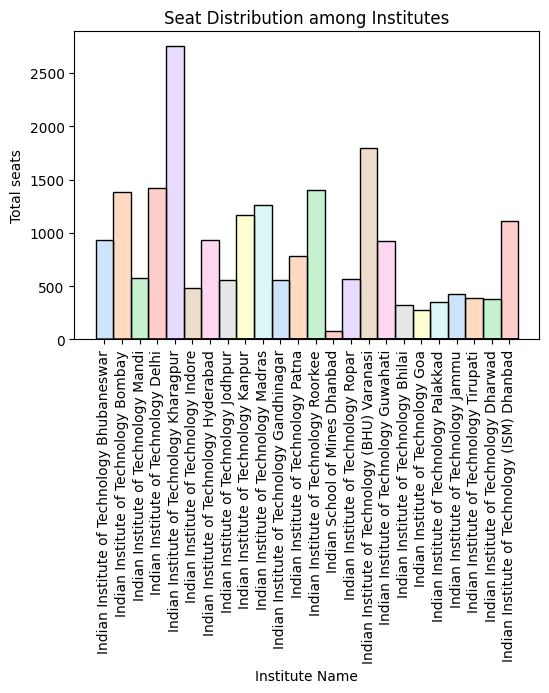

In [125]:
plt.figure(figsize=(6,4))
sns.histplot(x='Institute', data=df, hue='Institute', palette='pastel', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Institute Name')
plt.ylabel('Total seats')
plt.title('Seat Distribution among Institutes')

The bar chart illustrates the distribution of total seats across various Indian Institutes of Technology (IITs). IIT Kharagpur and IIT Bombay have the highest number of seats, each exceeding 2000, while several newer IITs have significantly lower seat counts, indicating a disparity in seat allocation among the institutes

(-1.0999989152364424, 1.0999936472618774, -1.099998458072269, 1.09999992657487)

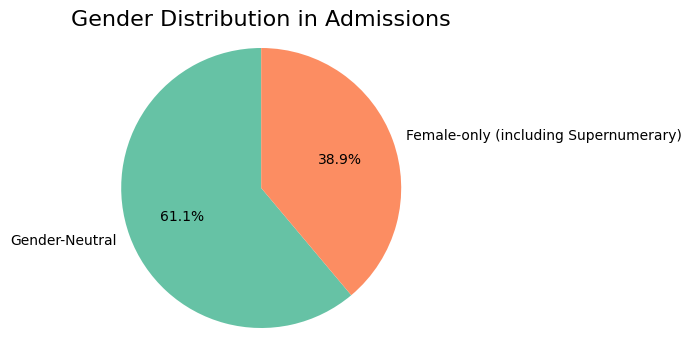

In [126]:
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(6,4)) 
plt.pie(gender_count, 
        labels=gender_count.index, 
        autopct='%1.1f%%', 
        startangle=90,     
        colors=['#66c2a5', '#fc8d62']) 
plt.title('Gender Distribution in Admissions', fontsize=16)
plt.axis('equal')

Text(0.5, 1.0, 'Seat Intake among Years')

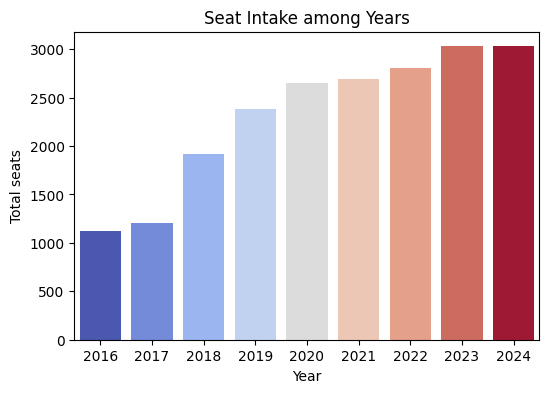

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(x='Year', data=df, hue='Year', palette='coolwarm', legend=False)
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Total seats')
plt.title('Seat Intake among Years')

Text(0.5, 1.0, 'Seat Type vs Total Seats')

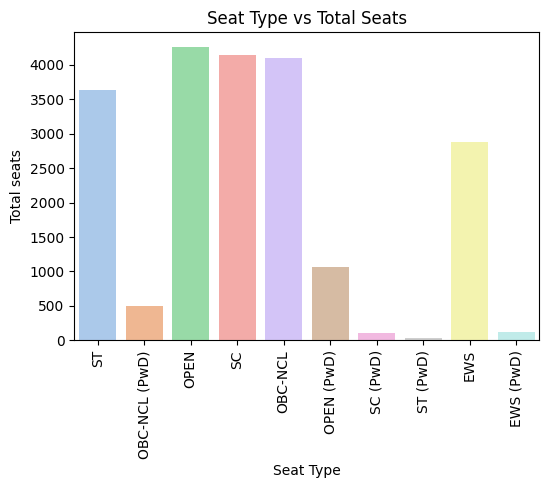

In [128]:
plt.figure(figsize=(6,4))
sns.countplot(x='Seat_Type', data=df, hue='Seat_Type', palette='pastel', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Seat Type')
plt.ylabel('Total seats')
plt.title('Seat Type vs Total Seats')

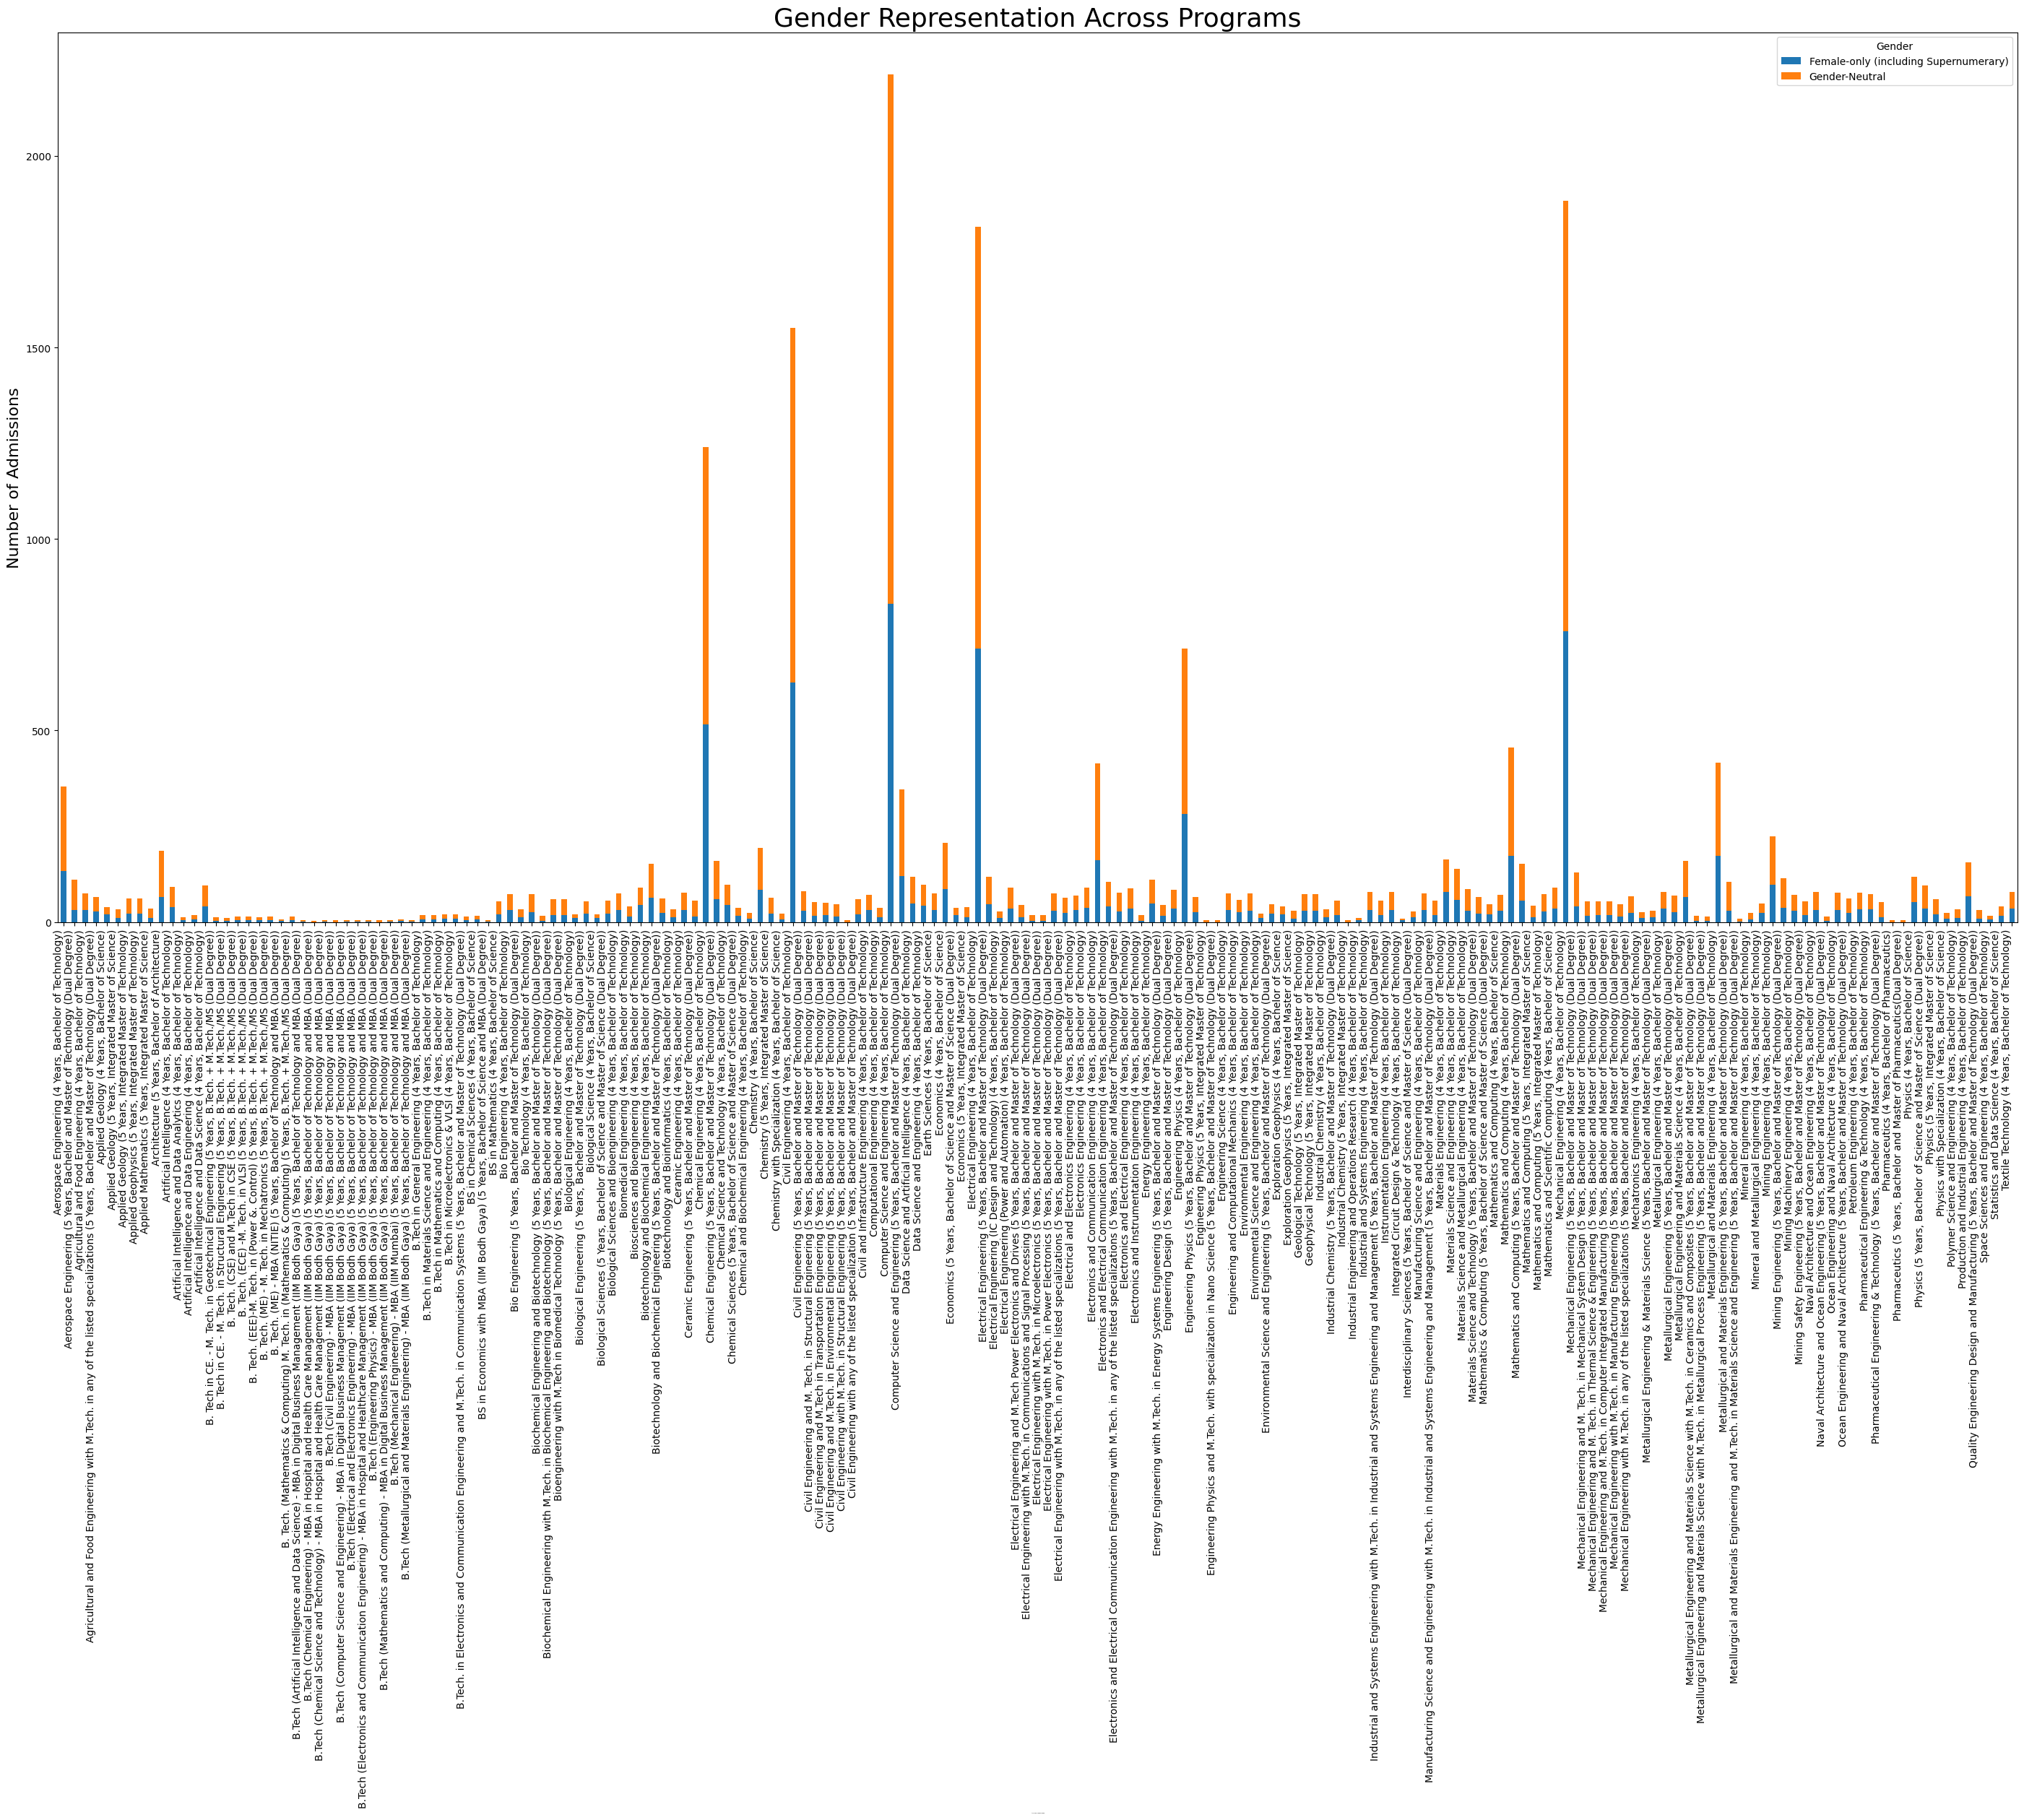

In [129]:
gender_program_counts = df.groupby(['Academic_Program_Name', 'Gender']).size().unstack()
gender_program_counts.plot(kind='bar', stacked=True, figsize=(35, 16))
plt.title('Gender Representation Across Programs', fontsize=26)
plt.xlabel('Academic Program Name', fontsize=0.5)
plt.ylabel('Number of Admissions', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender')

It represents gender distribution across various academic programs, distinguishing between general and female-only (including supernumerary) admissions. The orange bars (general admissions) are generally higher, indicating a larger male or combined presence in most programs, while the blue bars show female-specific entries, highlighting efforts to increase female representation in certain areas. The distribution varies significantly across different programs, with a few showing a notable number of female admissions.

Text(0, 0.5, 'Closing Rank')

<Figure size 600x400 with 0 Axes>

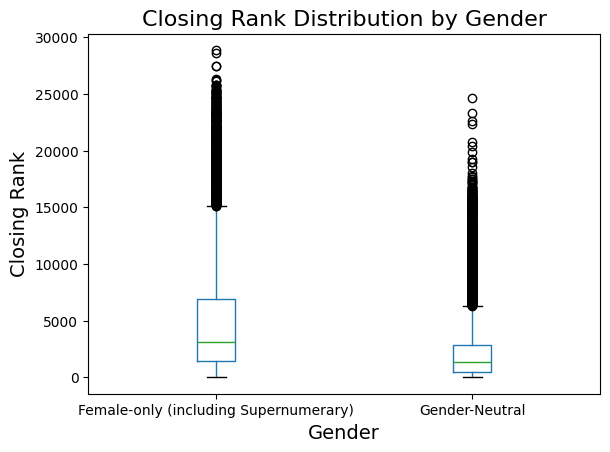

In [130]:
df['Closing_Rank'] = pd.to_numeric(df['Closing_Rank'], errors='coerce')
plt.figure(figsize=(6,4))
df.boxplot(column='Closing_Rank', by='Gender', grid=False)
plt.title('Closing Rank Distribution by Gender', fontsize=16)
plt.suptitle('') 
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Closing Rank', fontsize=14)

This compares the distribution of closing ranks for female-only (including supernumerary) and gender-neutral categories. The median closing rank for female-only admissions is higher, indicating a broader range of ranks being accepted, while the gender-neutral category has a lower median, showing a more competitive cutoff. Both categories have a significant number of outliers with high closing ranks.

Text(0, 0.5, 'Quota')

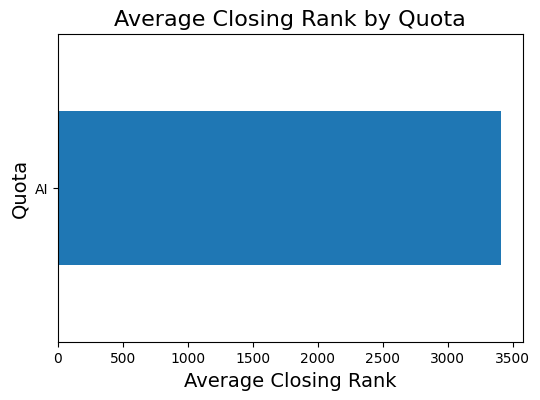

In [131]:
avg_closing_rank_quota = df.groupby('Quota')['Closing_Rank'].mean().sort_values()
plt.figure(figsize=(6,4))
avg_closing_rank_quota.plot(kind='barh')
plt.title('Average Closing Rank by Quota', fontsize=16)
plt.xlabel('Average Closing Rank', fontsize=14)
plt.ylabel('Quota', fontsize=14)

Text(345.7222222222222, 0.5, 'Academic Program Name')

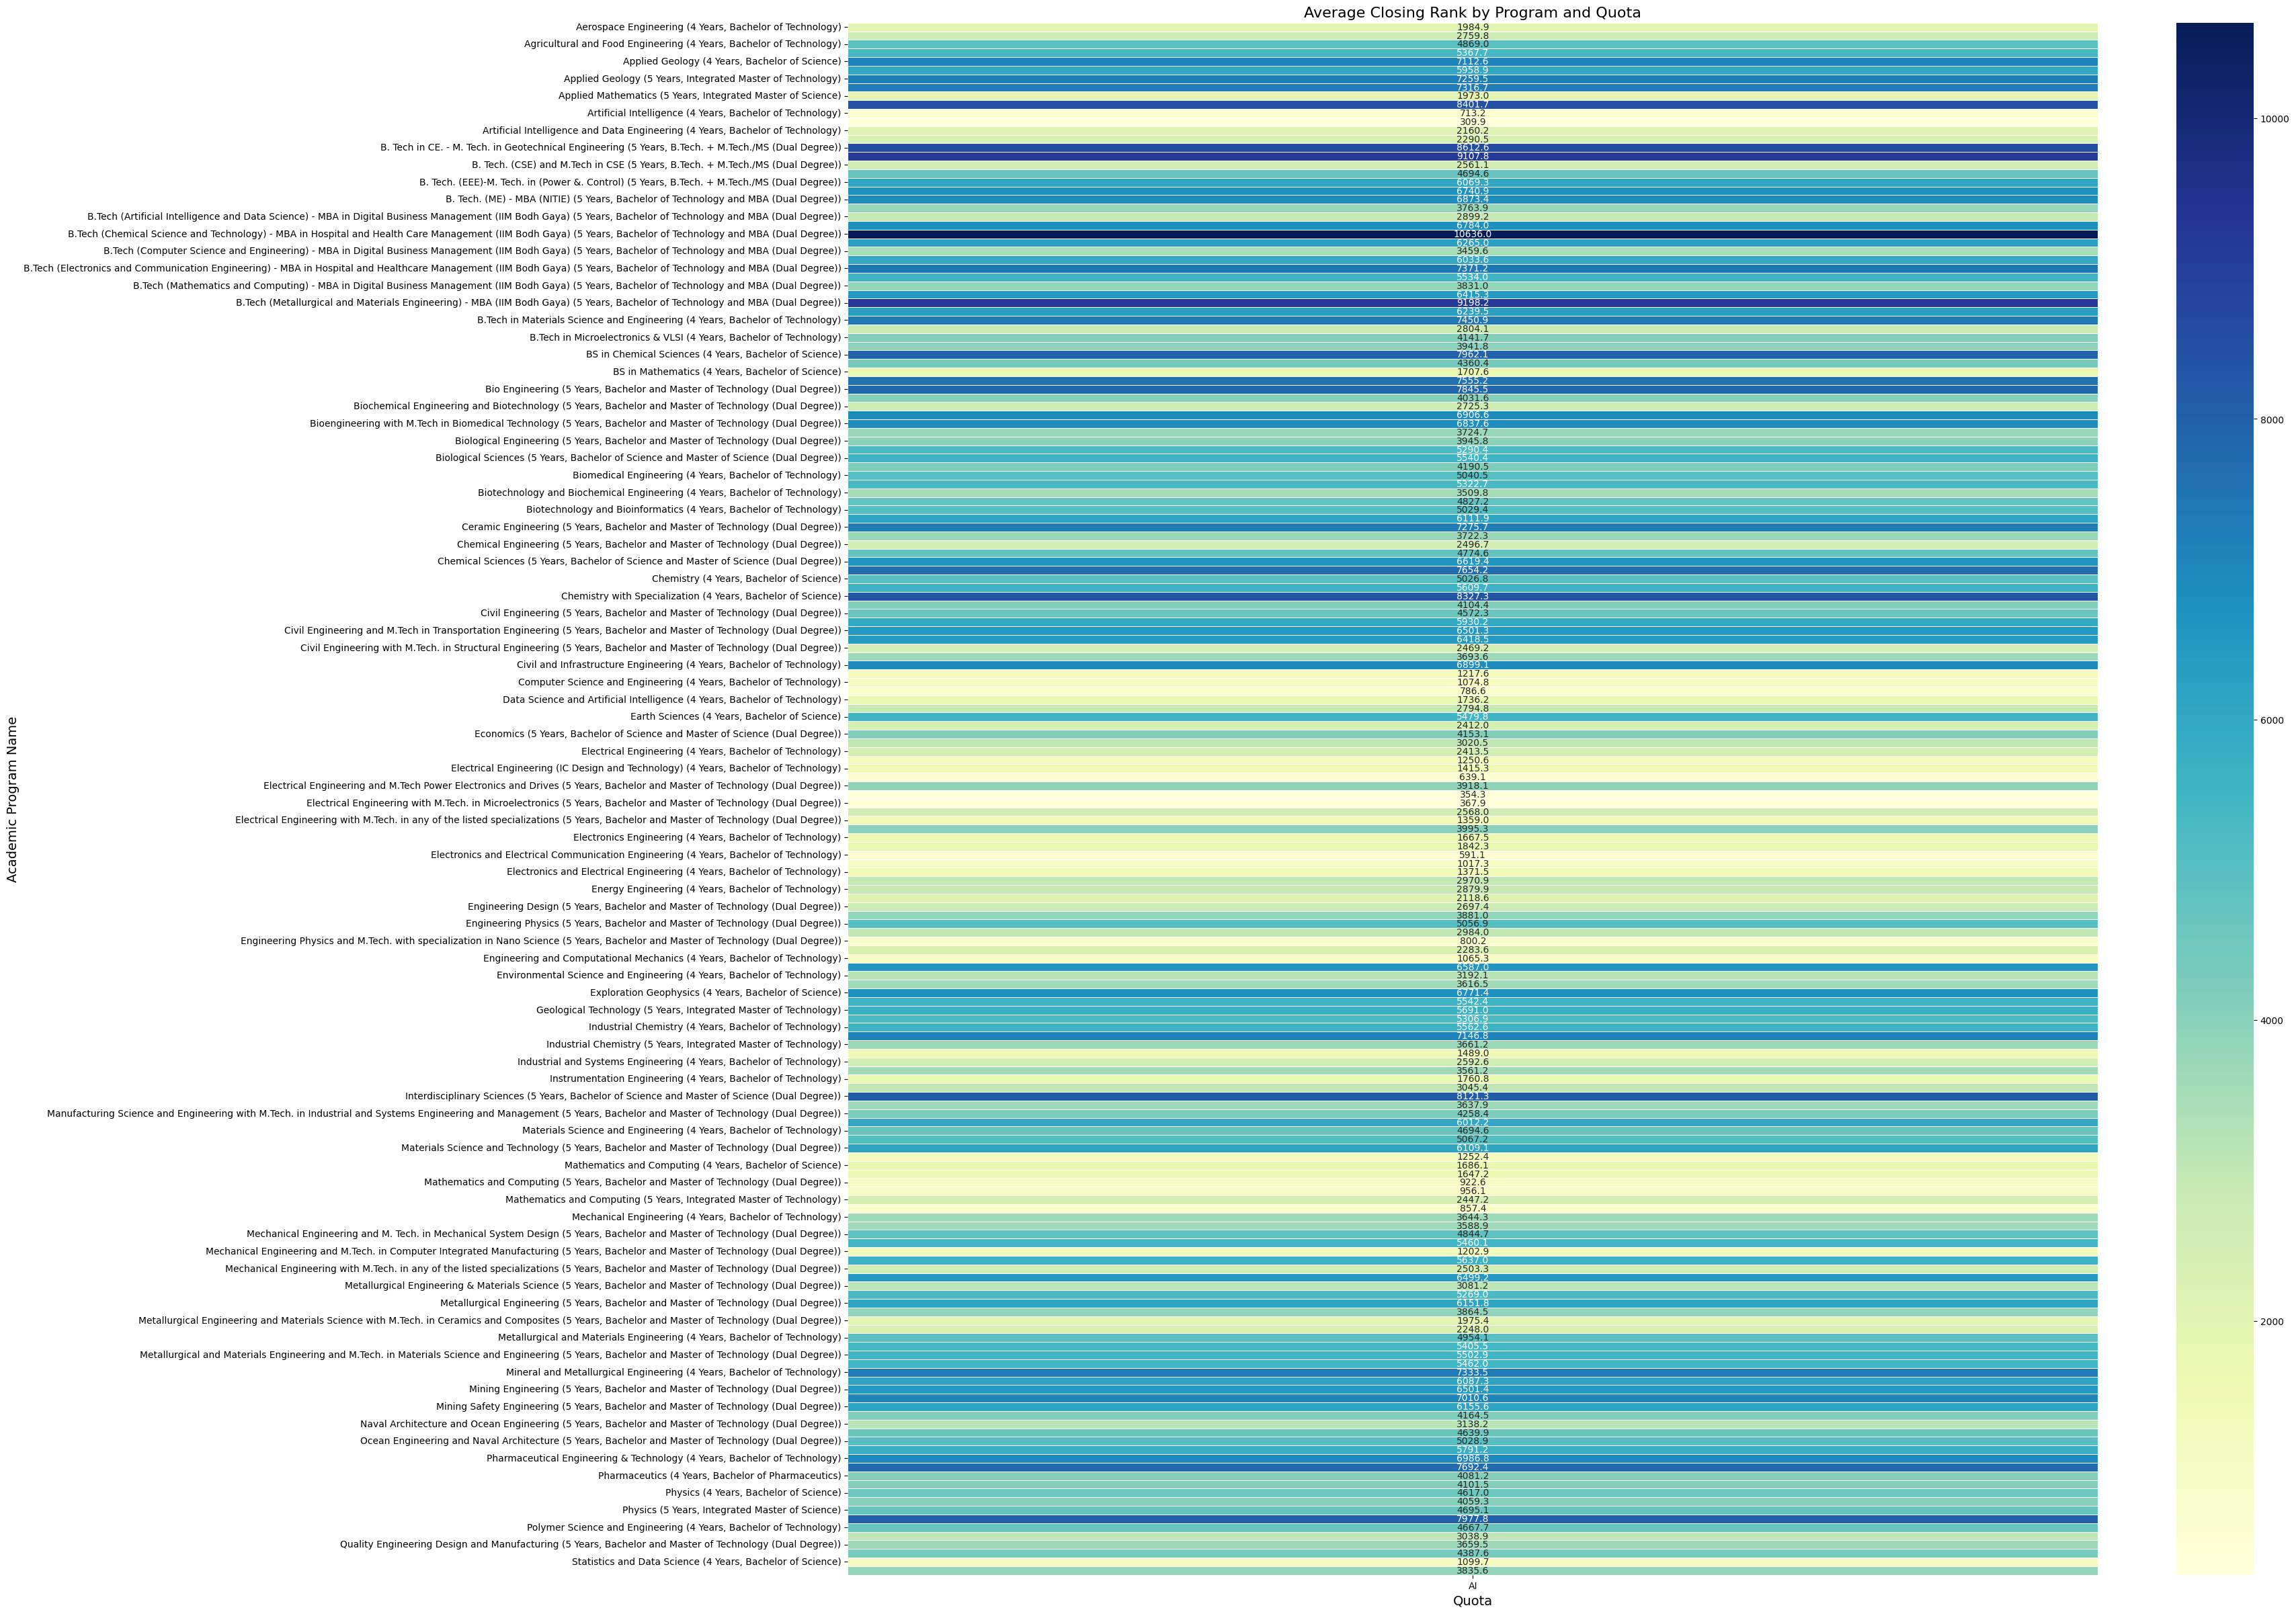

In [132]:
heatmap_data = df.pivot_table(values='Closing_Rank', index='Academic_Program_Name', columns='Quota', aggfunc='mean')
plt.figure(figsize=(30,30))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Average Closing Rank by Program and Quota', fontsize=16)
plt.xlabel('Quota', fontsize=14)
plt.ylabel('Academic Program Name', fontsize=14)

The image shows the average closing rank for various academic programs offered by a university, categorized by the program name and the associated quota. The color scale indicates the closing rank, with darker colors representing higher closing ranks and lighter colors indicating lower closing ranks. The data reveals that the closing ranks vary widely across different academic programs.

Text(0, 0.5, 'Average Closing Rank')

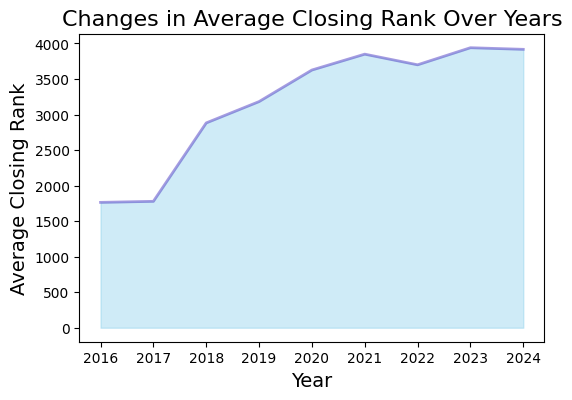

In [133]:
avg_closing_rank_year = df.groupby('Year')['Closing_Rank'].mean()
plt.figure(figsize=(6,4))
plt.fill_between(avg_closing_rank_year.index, avg_closing_rank_year, color='skyblue', alpha=0.4)
plt.plot(avg_closing_rank_year.index, avg_closing_rank_year, color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Changes in Average Closing Rank Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Closing Rank', fontsize=14)

Text(0.5, 1.0, 'Word Cloud of Academic Programs')

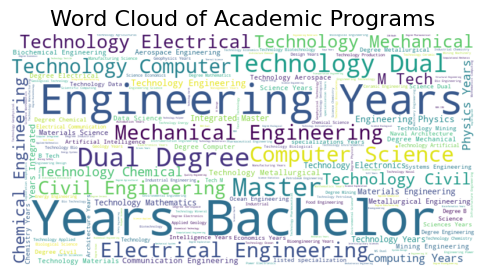

In [134]:
from wordcloud import WordCloud
text = ' '.join(df['Academic_Program_Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Academic Programs', fontsize=16)

Text(0.5, 1.0, 'Network Graph of Programs and Quotas')

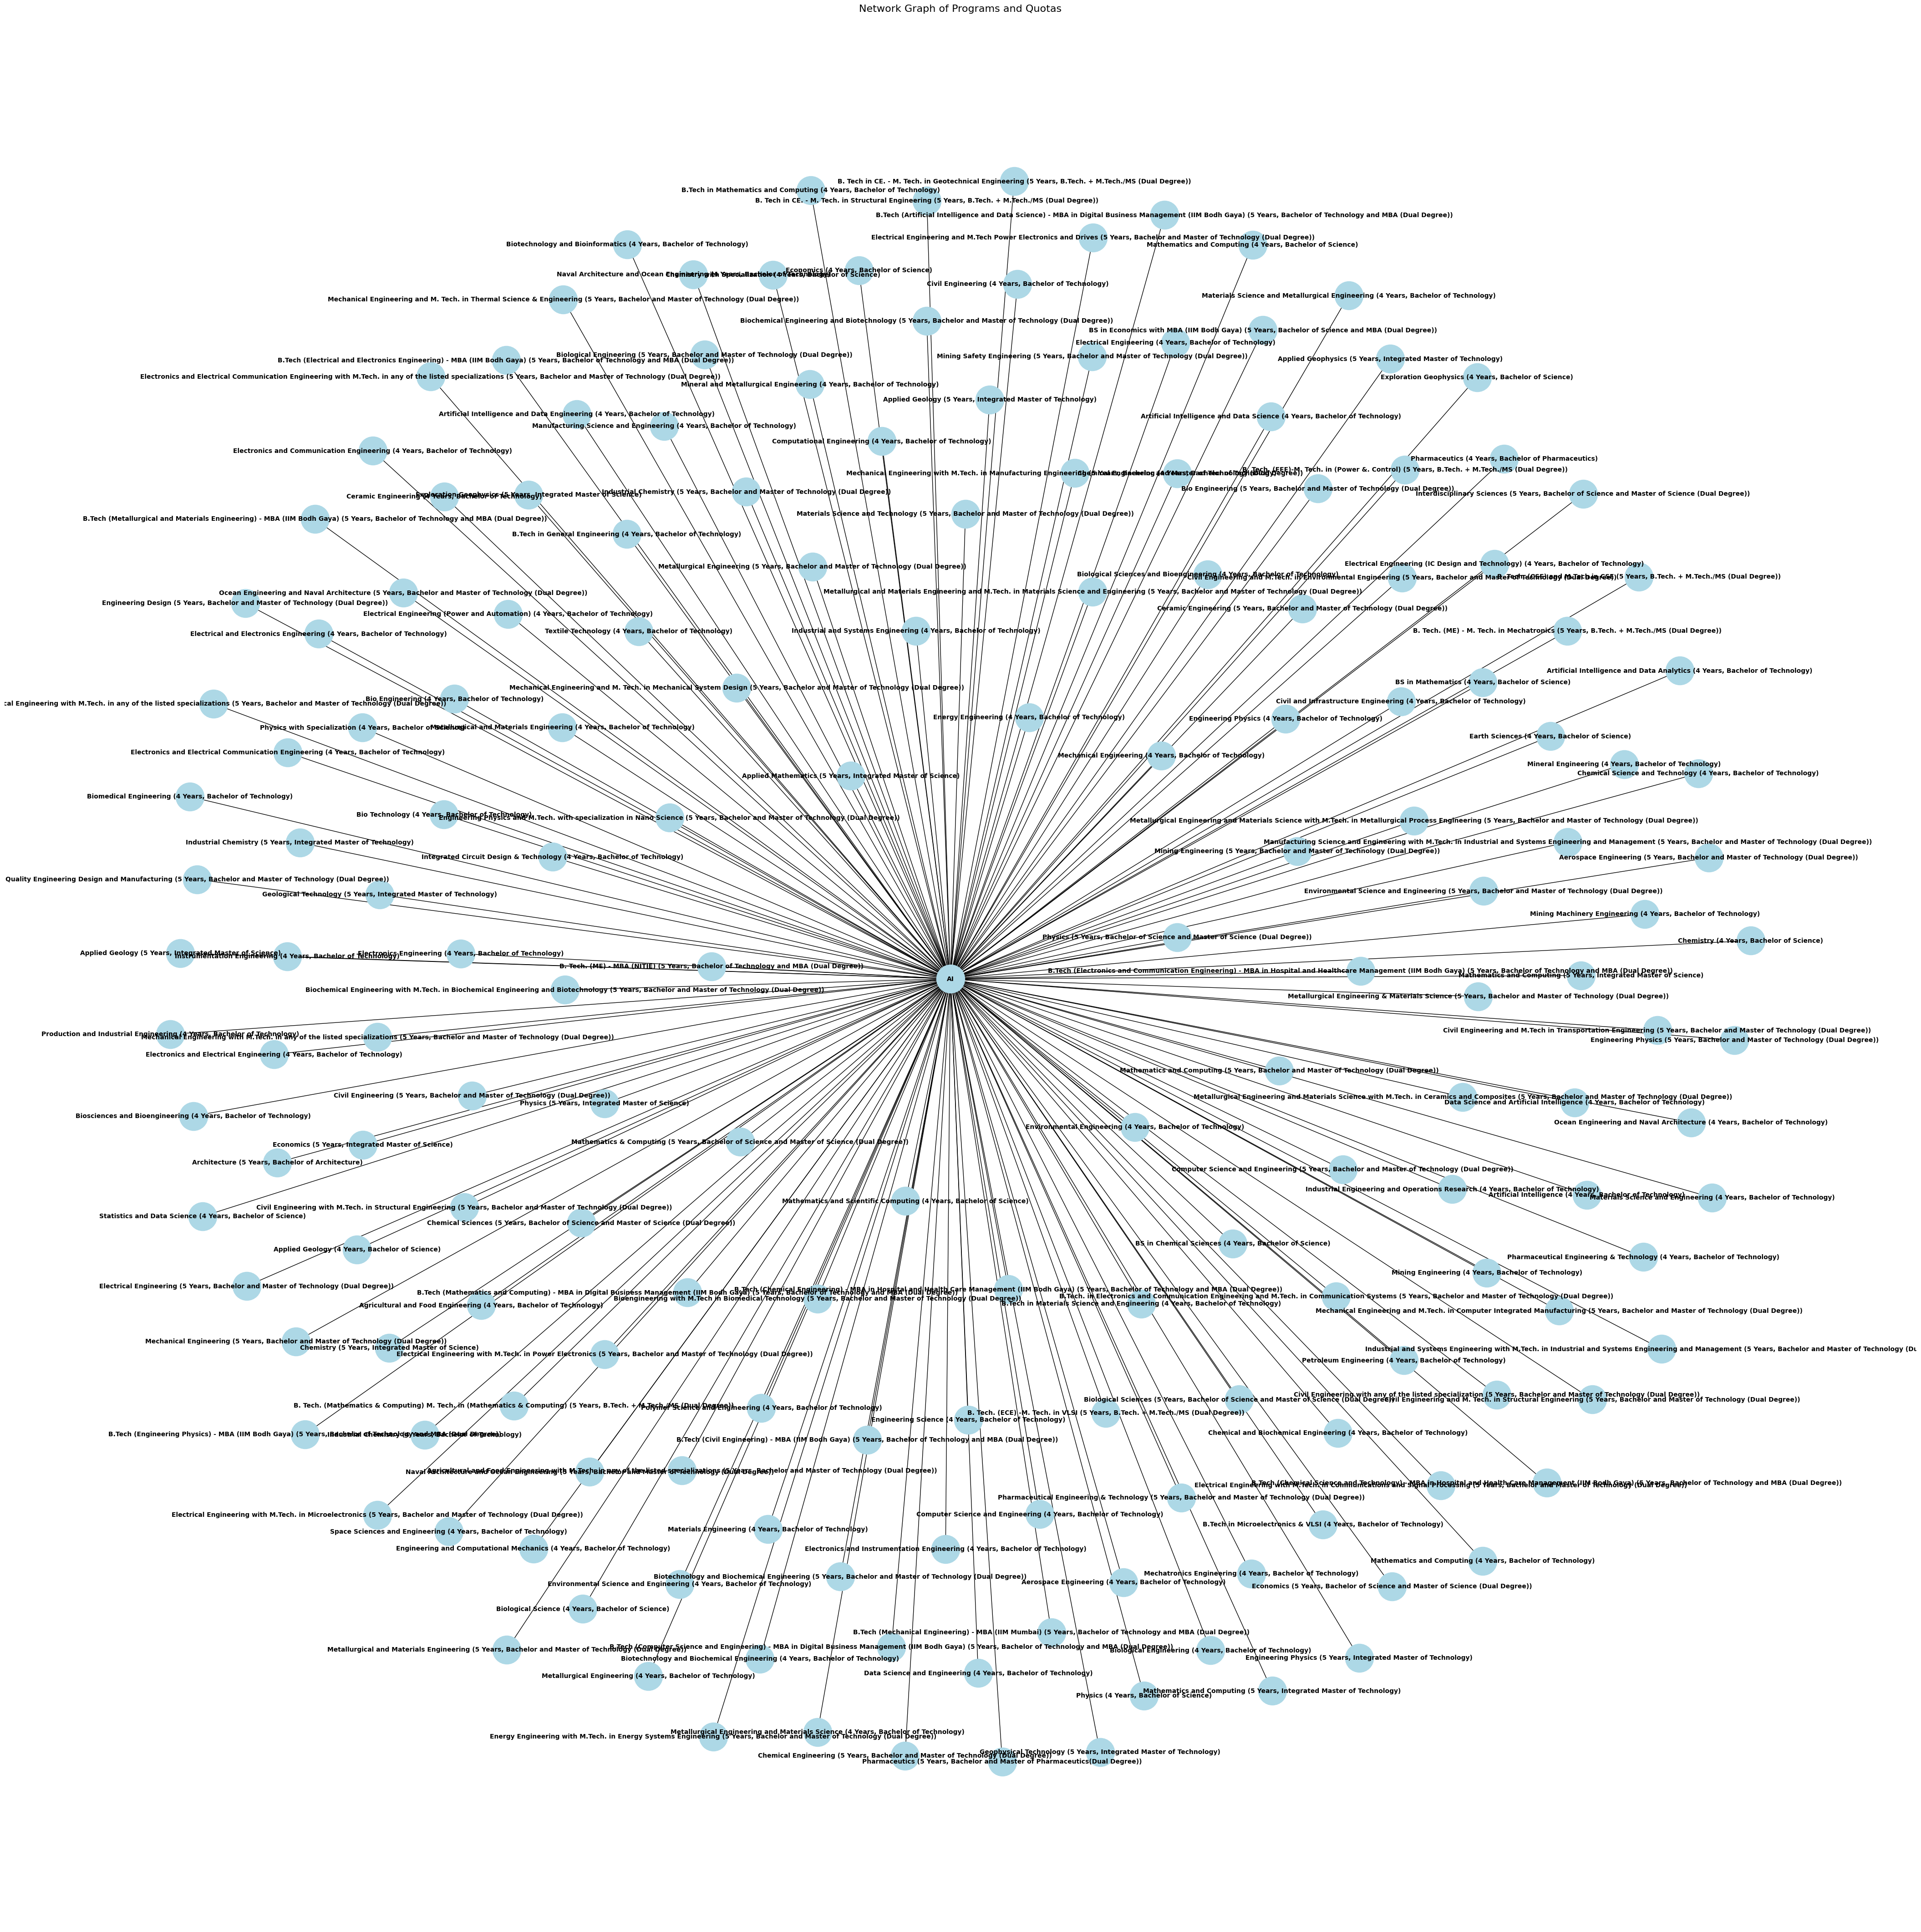

In [136]:
import networkx as nx
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['Academic_Program_Name'], row['Quota'])
plt.figure(figsize=(42, 42))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')
plt.title('Network Graph of Programs and Quotas', fontsize=16)

This represents different undergraduate and postgraduate programs offered by a university. The nodes represent the different programs, and the edges indicate the quotas allotted for each program. For example, the node "B.Tech (Electrical and Electronics Engineering)" has edges connected to "MBA" and "M.Tech". This indicates that students can pursue a Master of Business Administration (MBA) or a Master of Technology (M.Tech) after completing their Bachelors in Electrical and Electronics Engineering. The graph is likely used for planning admission processes and understanding the flow of students through different academic pathways within the university.